# RMSF

In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('~/Scripts/bin/v.mplstyle')

import pytraj as pt

In [2]:
# Load trajectory and topology files
# relativbe path tooooo
traj = pt.iterload('../1leader/4ntds/prod0?.nc', top='../1leader/4ntds/step3_pbcsetup_1264.parm7')
traj # Same as print(traj)

pytraj.TrajectoryIterator, 375 frames: 
Size: 4.907093 (GB)
<Topology: 585439 atoms, 187525 residues, 186013 mols, PBC with box type = orthorhombic>
           

In [3]:
pt.superpose(traj, ref=0, mask='@CA')
data = pt.rmsf(traj, mask='@CA')


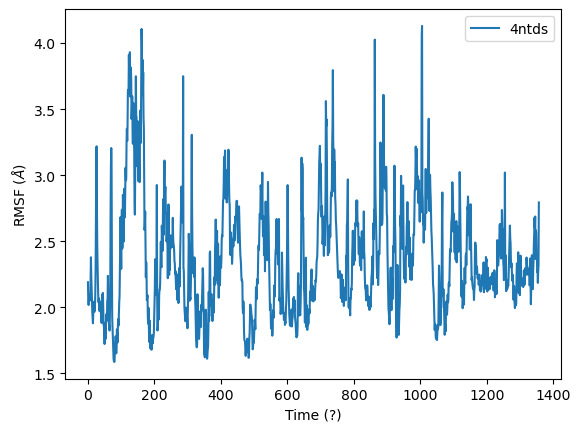

In [4]:
xdata = np.arange(1,len(data.T[0])+1)
ydata = data.T[1]+1
plt.plot(xdata, ydata, label='4ntds')

plt.xlabel('Time (?)') # not sure of time... too tired.. find prod.mdin and do this: dt*[savecoordinates evver N steps]
                       # i normally save every 1 ns cause tired 
plt.ylabel('RMSF ($\AA$)')
plt.legend()

os.makedirs('img', exist_ok=True)
# plt.savefig('img/rmsf-4ntds.png') # uncomment to save

In [5]:
dirnames = [
    '4ntds',
    '4ntov'
]

for dirname in dirnames:
    trajs = sorted(glob(f'../1leader/{dirname}/prod??.nc'))
    # print(trajs)
    traj = pt.iterload(trajs, top=f'../1leader/{dirname}/step3_pbcsetup_1264.parm7')
    # print(traj) /
    data = pt.rmsf(traj, mask='@CA':)
    
    xdata = np.arange(1,len(data.T[0])+1)
    ydata = data.T[1]+1
    plt.plot(xdata, ydata, label=f'{dirname}')   
    plt.legend()

SyntaxError: invalid syntax (1925435906.py, line 11)